<a href="https://colab.research.google.com/github/FennyLuv/Glottochronology/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import math
import numpy as np
import itertools

In [ ]:
# Load the data
df = pd.read_csv("/content/drive/MyDrive/HL Project/chl2023_eastern-austronesian_cognacy.tsv", sep='\t')

In [ ]:
df['CONCEPT'] = df['CONCEPT'].str.lower() # make all concepts lowercase, will be easier for comparing to swadish

In [ ]:
def compare_langs(df, lang1, lang2):
    cognates = 0
    no_cognates = 0
    na_count = 0

    for index, row in df.iterrows():
        # Check if either cell in the row is NaN
        if pd.isna(row[lang1]) or pd.isna(row[lang2]):
            na_count += 1
        elif row[lang1] == row[lang2]:
            cognates += 1
        else:
            no_cognates += 1

    return cognates, no_cognates, na_count

print(compare_langs(df, "Ambai (Yapen) [amk]", "Araki [akr]"))

(9, 49, 152)


In [ ]:
# Transpose the data so that each column corresponds to a language, makes it easier to quickly glance through it manually
df_transposed = df.set_index('CONCEPT').T
df_transposed

CONCEPT,eight,fifty,five,four,i,nine,one,one hundred,one thousand,seven,...,wide,wife,wind,wing,woman/female,woods/forest,worm (earthworm),year,yellow,you
Ambai (Yapen) [amk],NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Araki [akr],1.0,NaN,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN
As [asz],NaN,NaN,NaN,1.0,3.0,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
Bierebo (Yevali) [bnk],2.0,NaN,1.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,...,NaN,2.0,2.0,1.0,3.0,1.0,NaN,2.0,2.0,NaN
Biga (Misool) [xmt],NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,NaN,4.0,2.0,NaN,1.0,NaN,NaN
Buli [bzq],NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,NaN,2.0
Futuna-Aniwa (Aniwa) [fut],1.0,NaN,1.0,3.0,4.0,3.0,3.0,NaN,NaN,1.0,...,NaN,3.0,4.0,2.0,6.0,3.0,NaN,1.0,3.0,NaN
Gimon [gzn],NaN,NaN,NaN,1.0,1.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,2.0
Irarutu [irh],NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,...,3.0,NaN,NaN,3.0,1.0,NaN,NaN,1.0,NaN,NaN
Kasira (Irahutu) [irh],NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN


# Functions to help

In [ ]:
def calculate_divergence_time(m: int, k: int, r: float) -> float:
    """
    Calculate the divergence time between languages using Swadesh's glottochronological method.

    The function estimates the time since divergence between two languages based on the number
    of shared and non-shared cognates among a set of concepts and the rate of lexical replacement.

    Parameters:
    m (int): The number of shared cognates (concepts that have retained the same cognate set).
    k (int): The number of non-shared cognates (concepts that have different cognate sets).
    r (float): The rate of lexical replacement per thousand years.

    Returns:
    float: The estimated divergence time in years.

    Examples:
    >>> int(calculate_divergence_time(60, 40, 0.85))
    1561
    """
    try:
      numerator = 1000 * math.log10(m / (m + k))
      denominator = 2 * math.log10(r)
      return int(numerator / denominator)
    except ZeroDivisionError:
        return "Error: Division by zero"
    except ValueError as e:
        return f"Error: {e}"

In [ ]:
def compare_langs(df, lang1, lang2):
    cognates = 0
    no_cognates = 0
    na_count = 0

    for index, row in df.iterrows():
        # Check if either cell in the row is NaN
        if pd.isna(row[lang1]) or pd.isna(row[lang2]):
            na_count += 1
        elif row[lang1] == row[lang2]:
            cognates += 1
        else:
            no_cognates += 1

    return cognates, no_cognates, na_count

# Get the number of concepts (based on swadesh list)

In [ ]:
# found a list, but not sure if there is a better one (some spellings do not align with what is in the data for the project)
# Ex:
# Swadish: woman
# Project data: woman/female
# or should all of these be manually accounted for?
swadesh_list = pd.read_csv("https://raw.githubusercontent.com/LinguList/SwadeshLists/master/swadlists_edited/swadesh200.tsv", sep='\t')
swadesh_list['Concept']

0             ALL
1             AND
2      THE ANIMAL
3         THE ASH
4              AT
          ...    
196     THE WOODS
197      THE WORM
198           YOU
199      THE YEAR
200        YELLOW
Name: Concept, Length: 201, dtype: object

In [ ]:
data = []

for concept in swadesh_list['Concept']:
    concept = concept.lower()
    concept = concept.replace('the ','') # remove "the" from the begining, we dont have that in our data
    replace = { # this is probably not the way we actually want to do this, but this is the data we have right now
        'bad': 'bad, evil',
        'to burn (intransitive)': 'to burn',
        'child (young human)': 'child',
        'to cut': 'to cut, hack',
        'day (opposed to night)': 'day',
        'to die': 'to die, be dead',
        'blunt': 'dull, blunt',
        'soil': 'earth/soil',
        'fat': 'fat/grease',
        # 'foot': 'leg/foot',  # Leg and foot are different in Swadesh
        'in': 'in, inside',
        'to know': 'to know, be knowledgeable',
        'to lie (on floor)': 'to lie down',
        'to live': 'to live, be alive',
        'man': 'man/male',
        'meat': 'meat/flesh',
        'not': 'no, not',
        'person': 'person/human being',
        'to rain': 'rain',
        'road': 'road/path',
        'to smell (transitive)': 'to sniff, smell',
        'to stab': 'to stab, pierce',
        'to think (reflect)': 'to think',
        'to tie': 'to tie up, fasten',
        'woman': 'woman/female',
        'woods': 'woods/forest',
        'worm': 'worm (earthworm)'
    }

    if concept in replace:
      concept = replace[concept]

    try:
        # Append the concept and the languages to the new DataFrame
        languages_with_data = df_transposed[concept].dropna().index.tolist()
        # Append a dictionary with concept and languages to the list
        data.append({'Concept': concept, 'Languages': languages_with_data})
    except KeyError as e:
       print(f"concept: '{concept}' does not exist in project data")

swadesh_df = pd.DataFrame(data)

concept: 'animal' does not exist in project data
concept: 'bark' does not exist in project data
concept: 'because' does not exist in project data
concept: 'berry' does not exist in project data
concept: 'few' does not exist in project data
concept: 'to fight' does not exist in project data
concept: 'to float' does not exist in project data
concept: 'foot' does not exist in project data
concept: 'to freeze' does not exist in project data
concept: 'to give' does not exist in project data
concept: 'guts' does not exist in project data
concept: 'he' does not exist in project data
concept: 'heart' does not exist in project data
concept: 'here' does not exist in project data
concept: 'ice' does not exist in project data
concept: 'leg' does not exist in project data
concept: 'many' does not exist in project data
concept: 'mountain' does not exist in project data
concept: 'to play' does not exist in project data
concept: 'to pull' does not exist in project data
concept: 'to push' does not exis

In [ ]:
# print out the new df with concepts and lang it exist in
swadesh_df

,Concept,Languages
0,all,"[Araki [akr], Buli [bzq], Futuna-Aniwa (Aniwa)..."
1,and,"[Buli [bzq], Futuna-Aniwa (Aniwa) [fut], Gimon..."
2,ash,"[Araki [akr], As [asz], Bierebo (Yevali) [bnk]..."
3,at,"[Ambai (Yapen) [amk], Gimon [gzn], Kasira (Ira..."
4,back,"[Ambai (Yapen) [amk], Araki [akr], Bierebo (Ye..."
...,...,...
158,woods/forest,"[Bierebo (Yevali) [bnk], Biga (Misool) [xmt], ..."
159,worm (earthworm),"[Buli [bzq], Minyaifuin (Gebe) [gei], Pulau (A..."
160,you,"[As [asz], Buli [bzq], Gimon [gzn], Maskelynes..."
161,year,"[As [asz], Bierebo (Yevali) [bnk], Biga (Misoo..."


In [ ]:
# Lets test and see if we can get number of concepts for some langs (just checks the languages column for matches)
num_concepts = len(swadesh_df[swadesh_df['Languages'].apply(lambda x: all(lang in x for lang in ["Waropen [wrp]", "As [asz]", "Biga (Misool) [xmt]", "Minyaifuin (Gebe) [gei]", "Ambai (Yapen) [amk]", "Windesi Wandamen [wad]"]))])
print(f"Number of concepts: {num_concepts}")

Number of concepts: 18


# Gloth

In [ ]:
# 0.7
# 0.7525
# 0.805


r = 0.805 # the glot constant - test values between 0.7 - 0.805
USE_SWADESH = True

# Get cognates and compare all languages

In [ ]:



languages = df_transposed.index.tolist() # gets us a list of all the languages


# Initialize lists to store results
l1 = []
l2 = []
cognates = []
non_cognates = []
nan_values = []
t = []
common_concepts = []

# Loop over each language in pairs of two, iter makes this much easier so we can check each of the langs
for lang1, lang2 in itertools.combinations(languages, 2):

    concepts = swadesh_df[swadesh_df['Languages'].apply(lambda x: all(lang in x for lang in [lang1, lang2]))]['Concept']


    # Get count of cognates


    if USE_SWADESH:
      cognate, non_cognate, na_count = compare_langs(df[df["CONCEPT"].isin(concepts)], lang1, lang2)
    else:
      cognate, non_cognate, na_count = compare_langs(df, lang1, lang2)


    # Store results in lists
    l1.append(lang1)
    l2.append(lang2)
    cognates.append(cognate)
    non_cognates.append(non_cognate)
    nan_values.append(na_count)
    t.append(calculate_divergence_time(cognate, non_cognate, r))
    common_concepts.append(len(concepts))

# New df with the results
data = pd.DataFrame({
    "lang1": l1,
    "lang2": l2,
    "Cognates": cognates,
    "Non-Cognates": non_cognates,
    #"NaN-values": nan_values,
    "t": t,
    "Concepts": common_concepts
})


In [ ]:
data

,lang1,lang2,Cognates,Non-Cognates,t,Concepts
0,Ambai (Yapen) [amk],Araki [akr],7,44,4577,51
1,Ambai (Yapen) [amk],As [asz],23,27,1789,50
2,Ambai (Yapen) [amk],Bierebo (Yevali) [bnk],6,62,5596,68
3,Ambai (Yapen) [amk],Biga (Misool) [xmt],20,30,2112,50
4,Ambai (Yapen) [amk],Buli [bzq],16,23,2053,39
...,...,...,...,...,...,...
185,Roria [rga],Waropen [wrp],8,30,3591,38
186,Roria [rga],Windesi Wandamen [wad],6,52,5229,58
187,Vao [vao],Waropen [wrp],13,43,3366,56
188,Vao [vao],Windesi Wandamen [wad],14,66,4017,80


In [ ]:
data.to_latex(index=False,)

'\\begin{tabular}{llrrrr}\n\\toprule\nlang1 & lang2 & Cognates & Non-Cognates & t & Concepts \\\\\n\\midrule\nAmbai (Yapen) [amk] & Araki [akr] & 7 & 44 & 4577 & 51 \\\\\nAmbai (Yapen) [amk] & As [asz] & 23 & 27 & 1789 & 50 \\\\\nAmbai (Yapen) [amk] & Bierebo (Yevali) [bnk] & 6 & 62 & 5596 & 68 \\\\\nAmbai (Yapen) [amk] & Biga (Misool) [xmt] & 20 & 30 & 2112 & 50 \\\\\nAmbai (Yapen) [amk] & Buli [bzq] & 16 & 23 & 2053 & 39 \\\\\nAmbai (Yapen) [amk] & Futuna-Aniwa (Aniwa) [fut] & 12 & 55 & 3964 & 67 \\\\\nAmbai (Yapen) [amk] & Gimon [gzn] & 13 & 26 & 2532 & 39 \\\\\nAmbai (Yapen) [amk] & Irarutu [irh] & 21 & 17 & 1367 & 38 \\\\\nAmbai (Yapen) [amk] & Kasira (Irahutu) [irh] & 21 & 15 & 1242 & 36 \\\\\nAmbai (Yapen) [amk] & Lelepa [lpa] & 6 & 61 & 5561 & 67 \\\\\nAmbai (Yapen) [amk] & Maskelynes [klv] & 9 & 55 & 4521 & 64 \\\\\nAmbai (Yapen) [amk] & Minyaifuin (Gebe) [gei] & 19 & 29 & 2136 & 48 \\\\\nAmbai (Yapen) [amk] & Numfor [bhw] & 25 & 13 & 965 & 38 \\\\\nAmbai (Yapen) [amk] & Paama

# ages of nodes

In [ ]:
# All internal nodes
nodes = {
        "Yepen": ["Ambai (Yapen) [amk]", "Windesi Wandamen [wad]"],
        "Raja-Ampat": ["As [asz]", "Biga (Misool) [xmt]", "Minyaifuin (Gebe) [gei]"],
        "Cenderawasih Bay": ["Waropen [wrp]", "As [asz]", "Biga (Misool) [xmt]", "Minyaifuin (Gebe) [gei]", "Ambai (Yapen) [amk]", "Windesi Wandamen [wad]"], # Biak missing
        "West New Guniea": ["Pulau (Arguni) [agf]", "Waropen [wrp]", "As [asz]", "Biga (Misool) [xmt]", "Minyaifuin (Gebe) [gei]", "Ambai (Yapen) [amk]", "Windesi Wandamen [wad]"],
        "Irarutuic": ["Irarutu [irh]", "Kasira (Irahutu) [irh]" ],
        "South Halmahera": ["Irarutu [irh]", "Kasira (Irahutu) [irh]", "Buli [bzq]"],
        "Papua": ["Pulau (Arguni) [agf]", "Waropen [wrp]", "As [asz]", "Biga (Misool) [xmt]", "Minyaifuin (Gebe) [gei]", "Ambai (Yapen) [amk]", "Windesi Wandamen [wad]", "Irarutu [irh]", "Kasira (Irahutu) [irh]", "Buli [bzq]"],
        "West Santo": ["Araki [akr]", "Roria [rga]"],
        "Malakula": ["Maskelynes [klv]", "Vao [vao]"],
        "Vanuatu": ["Araki [akr]", "Roria [rga]", "Maskelynes [klv]", "Vao [vao]", "Lelepa [lpa]", "Bierebo (Yevali) [bnk]", "Paama (Lironesa) [pma]"],
}

In [ ]:
# Looping over all internal nodes, and getting the number of cognates and non-cognates + caluclation of the divergence time
results = []
for node, langs in nodes.items():
    for i in range(len(langs)):
        for j in range(i + 1, len(langs)):
            filtered_data = data[(data['lang1'] == langs[i]) & (data['lang2'] == langs[j])]
            for row in filtered_data.itertuples(index=False):
                results.append([node, *row])

In [ ]:
nodes_df = pd.DataFrame(results, columns=['node', 'lang1', 'lang2', 'Cognates', 'Non-Cognates', 't', 'Concepts'])
nodes_df.to_latex(index=False,)

'\\begin{tabular}{lllrrrr}\n\\toprule\nnode & lang1 & lang2 & Cognates & Non-Cognates & t & Concepts \\\\\n\\midrule\nYepen & Ambai (Yapen) [amk] & Windesi Wandamen [wad] & 64 & 6 & 206 & 70 \\\\\nRaja-Ampat & As [asz] & Biga (Misool) [xmt] & 51 & 6 & 256 & 57 \\\\\nRaja-Ampat & As [asz] & Minyaifuin (Gebe) [gei] & 45 & 9 & 420 & 54 \\\\\nRaja-Ampat & Biga (Misool) [xmt] & Minyaifuin (Gebe) [gei] & 47 & 11 & 484 & 58 \\\\\nCenderawasih Bay & Waropen [wrp] & Windesi Wandamen [wad] & 36 & 13 & 710 & 49 \\\\\nCenderawasih Bay & As [asz] & Biga (Misool) [xmt] & 51 & 6 & 256 & 57 \\\\\nCenderawasih Bay & As [asz] & Minyaifuin (Gebe) [gei] & 45 & 9 & 420 & 54 \\\\\nCenderawasih Bay & As [asz] & Windesi Wandamen [wad] & 24 & 30 & 1869 & 54 \\\\\nCenderawasih Bay & Biga (Misool) [xmt] & Minyaifuin (Gebe) [gei] & 47 & 11 & 484 & 58 \\\\\nCenderawasih Bay & Biga (Misool) [xmt] & Windesi Wandamen [wad] & 20 & 34 & 2289 & 54 \\\\\nCenderawasih Bay & Minyaifuin (Gebe) [gei] & Windesi Wandamen [wad]

In [ ]:
nodes_df['Concepts'] = pd.to_numeric(nodes_df['Concepts'])
print(f"Concepts mean: {int(nodes_df['Concepts'].mean())}")



nodes_df['Cognates'] = pd.to_numeric(nodes_df['Cognates'])
print(f"Cognates mean: {int(nodes_df['Cognates'].mean())}")


nodes_df['Non-Cognates'] = pd.to_numeric(nodes_df['Non-Cognates'])
print(f"Non-Cognates mean: {int(nodes_df['Non-Cognates'].mean())}")


nodes_df['t'] = pd.to_numeric(nodes_df['t'])
print(f"t mean: {int(nodes_df['t'].mean())}")


Concepts mean: 63
Cognates mean: 35
Non-Cognates mean: 27
t mean: 1325


In [ ]:
# Now we can group by the internal nodes, and get the ages
ages = nodes_df.groupby('node')[['t', 'Cognates', 'Non-Cognates', 'Concepts']].agg(['mean']).reset_index()
ages.columns = ['node', 'age', 'Cognates', 'Non-Cognates', 'Concepts']
ages['age'] = ages['age'].round()
ages['Cognates'] = ages['Cognates'].round(2)
ages['Non-Cognates'] = ages['Non-Cognates'].round(2)
ages['Concepts'] = ages['Concepts'].round(2)
#ages.to_latex(index=False,)
ages

,node,age,Cognates,Non-Cognates,Concepts
0,Cenderawasih Bay,1048.0,38.62,17.88,56.50
1,Irarutuic,265.0,41.00,5.00,46.00
2,Malakula,2202.0,50.00,80.00,130.00
3,Papua,1195.0,29.60,17.25,46.85
4,Raja-Ampat,387.0,47.67,8.67,56.33
5,South Halmahera,265.0,41.00,5.00,46.00
6,Vanuatu,2333.0,38.09,65.82,103.91
7,West New Guniea,1185.0,34.50,18.50,53.00
8,West Santo,1628.0,37.00,38.00,75.00
9,Yepen,206.0,64.00,6.00,70.00


## Age of Proto-Eastern-Austronesian

In [ ]:
# if we just take the mean disregarding concepts
print("Age of Proto-Eastern-Austronesian:", int(data["t"].mean()))

Age of Proto-Eastern-Austronesian: 2667


In [ ]:
print("r =",r)
# lets check in increments of 10 based on concepts
for i in range(10, 101, 10):
    print(f"Age of Proto-Eastern-Austronesian: Concepts > {i}: {int(data[data['Concepts'] > i]['t'].mean())} years, num of languages: ", len(data[data['Concepts'] > i]['t']))

r = 0.805
Age of Proto-Eastern-Austronesian: Concepts > 10: 2667 years, num of languages:  190
Age of Proto-Eastern-Austronesian: Concepts > 20: 2667 years, num of languages:  190
Age of Proto-Eastern-Austronesian: Concepts > 30: 2685 years, num of languages:  188
Age of Proto-Eastern-Austronesian: Concepts > 40: 2937 years, num of languages:  157
Age of Proto-Eastern-Austronesian: Concepts > 50: 3234 years, num of languages:  119
Age of Proto-Eastern-Austronesian: Concepts > 60: 3417 years, num of languages:  77
Age of Proto-Eastern-Austronesian: Concepts > 70: 3235 years, num of languages:  44
Age of Proto-Eastern-Austronesian: Concepts > 80: 3059 years, num of languages:  29
Age of Proto-Eastern-Austronesian: Concepts > 90: 2964 years, num of languages:  27
Age of Proto-Eastern-Austronesian: Concepts > 100: 2990 years, num of languages:  15


question here is, whats a good threshold? we can see that it starts turning back with 80 concepts

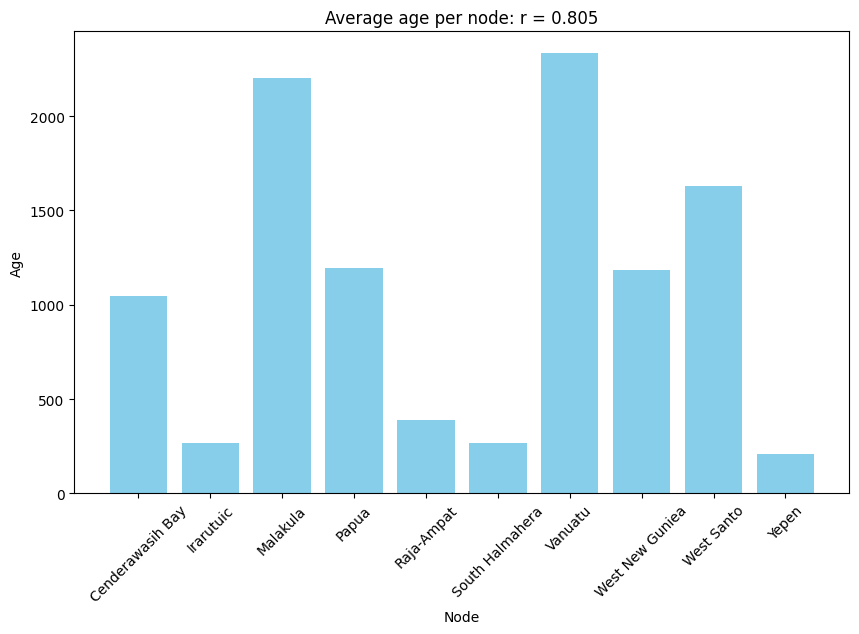

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(ages['node'], ages['age'], color='skyblue')
plt.xlabel('Node')
plt.ylabel('Age')
plt.title(f'Average age per node: r = {r}')
plt.xticks(rotation=45)
plt.show()

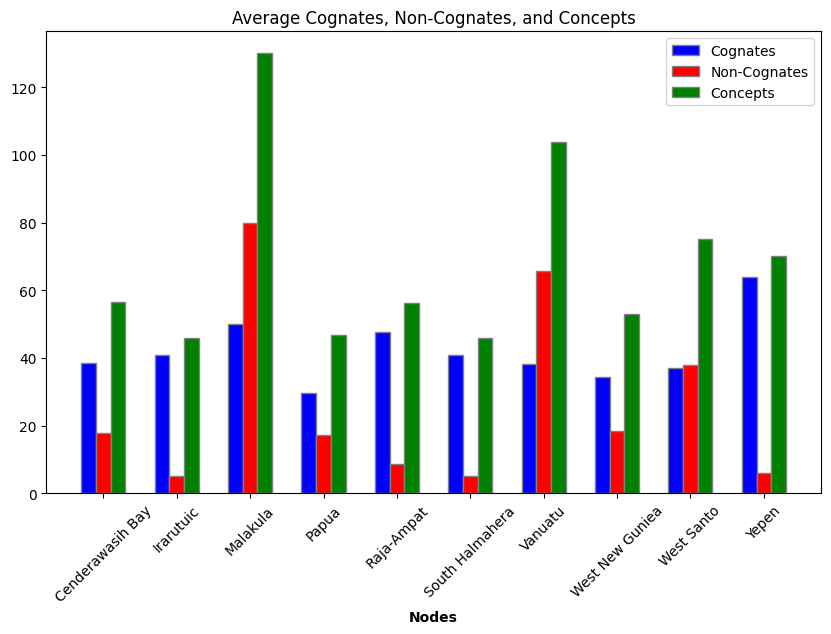

In [ ]:
node_c = nodes_df.groupby('node')[['Cognates', 'Non-Cognates', 'Concepts']].agg(['mean']).reset_index()
node_c.columns = ['node', 'Cognates', 'Non-Cognates', 'Concepts']

nodes = node_c['node']
cognates = node_c['Cognates']
non_cognates = node_c['Non-Cognates']
concepts = node_c['Concepts']

bar_width = 0.2
r1 = np.arange(len(nodes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cognates, color='b', width=bar_width, edgecolor='grey', label='Cognates')
plt.bar(r2, non_cognates, color='r', width=bar_width, edgecolor='grey', label='Non-Cognates')
plt.bar(r3, concepts, color='g', width=bar_width, edgecolor='grey', label='Concepts')




plt.xlabel('Nodes', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(nodes))], nodes, rotation=45)
plt.title('Average Cognates, Non-Cognates, and Concepts')

plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<ipython-input-289-2c48c961a1fc>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  yepen = int(ages.loc[ages["node"] == "Yepen"]["age"])
<ipython-input-289-2c48c961a1fc>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  raja_ampat = int(ages.loc[ages["node"] == "Raja-Ampat"]["age"])
<ipython-input-289-2c48c961a1fc>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Cenderawasih_Bay = int(ages.loc[ages["node"] == "Cenderawasih Bay"]["age"])
<ipython-input-289-2c48c961a1fc>:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  West_New_Guinea = int(ages.loc[ages["node"] == "West New Guniea"]["age"])
<ipython-input-289-2c48c

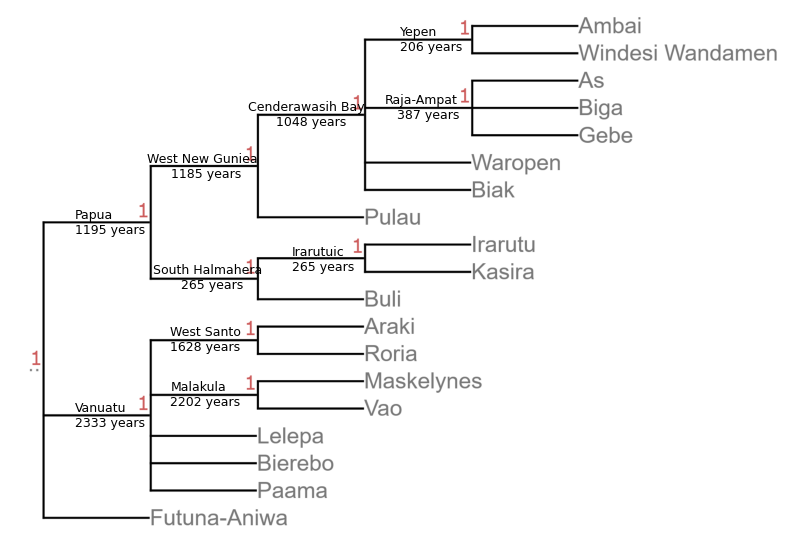

In [ ]:
yepen = int(ages.loc[ages["node"] == "Yepen"]["age"])
raja_ampat = int(ages.loc[ages["node"] == "Raja-Ampat"]["age"])
Cenderawasih_Bay = int(ages.loc[ages["node"] == "Cenderawasih Bay"]["age"])
West_New_Guinea = int(ages.loc[ages["node"] == "West New Guniea"]["age"])
South_Halmahera = int(ages.loc[ages["node"] == "South Halmahera"]["age"])
Irarutuic = int(ages.loc[ages["node"] == "Irarutuic"]["age"])
Papua = int(ages.loc[ages["node"] == "Papua"]["age"])
Vanuatu = int(ages.loc[ages["node"] == "Vanuatu"]["age"])
WestSanto = int(ages.loc[ages["node"] == "West Santo"]["age"])
Malakula = int(ages.loc[ages["node"] == "Malakula"]["age"])

image_path = '/content/drive/MyDrive/HL Project/thumbnail_Screenshot 2024-06-03 143926.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels





plt.text(900, 94, f"Yepen\n{yepen} years", fontsize=9)
plt.text(865, 251, f"Raja-Ampat\n   {raja_ampat} years", fontsize=9)
plt.text(550, 267, f"Cenderawasih Bay\n       {Cenderawasih_Bay} years", fontsize=9)
plt.text(315, 388, f"West New Guniea\n      {West_New_Guinea} years", fontsize=9)
plt.text(330, 643, f"South Halmahera\n       {South_Halmahera} years", fontsize=9)
plt.text(650, 602, f"Irarutuic\n{Irarutuic} years", fontsize=9)
plt.text(150, 516, f"Papua\n{Papua} years", fontsize=9)
plt.text(150, 963, f"Vanuatu\n{Vanuatu} years", fontsize=9)
plt.text(370, 787, f"West Santo\n{WestSanto} years", fontsize=9)
plt.text(370, 915, f"Malakula\n{Malakula} years", fontsize=9)
plt.show()


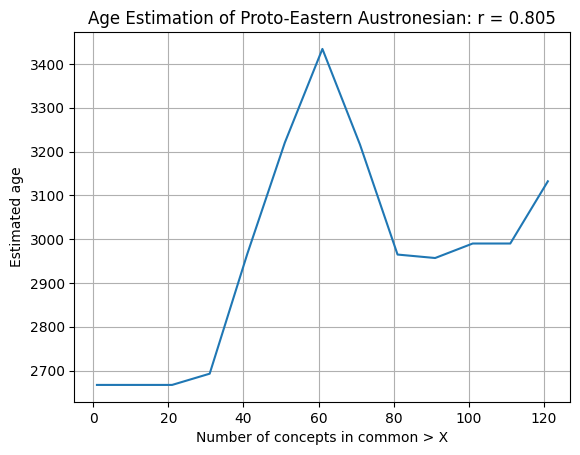

In [ ]:
import matplotlib.pyplot as plt

ages = []
means = []

for i in range(1, 131, 10):
    ages.append(i)
    mean_age = data[data['Concepts'] > i]['t'].mean()
    means.append(mean_age)

plt.plot(ages, means)
plt.xlabel('Number of concepts in common > X')
plt.ylabel('Estimated age')
plt.title(f'Age Estimation of Proto-Eastern Austronesian: r = {r}')
plt.grid(True)
plt.show()
